In [1]:
import os
import glob
import pandas as pd
import ipywidgets as widgets
import matplotlib.pyplot as plt
from mesa_reader import MesaData
import numpy as np
from IPython.display import display
from IPython.display import clear_output
from ipywidgets import interact


In [64]:

plt.rc('font', family='serif')
plt.rcParams['text.usetex'] = False
fs = 24

# update various fontsizes to match
params = {'figure.figsize': (12, 8),
          'legend.fontsize': 0.6*fs,
          'axes.labelsize': 0.8*fs,
          'axes.titlesize': 0.8*fs,
          'xtick.labelsize': 0.6 * fs,
          'ytick.labelsize': 0.6 * fs,
          'axes.linewidth': 1.1,
          'xtick.major.size': 7,
          'xtick.minor.size': 4,
          'ytick.major.size': 7,
          'ytick.minor.size': 4}
plt.rcParams.update(params)


In [7]:
# Define the directory path where the files are located
directory_path = '/userdata/data/bhat/D6/KavliSP23/Test1/Long_Evolve/LOGS_evolvedfromfinal_1D8years_nomaxtimestep_burning/'
directory_path2 = '/userdata/data/bhat/D6/KavliSP23/Test1/Long_Evolve/LOGS_evolvedfromfinal10He4_1D8years_nomaxtimestep_burning/'
directory_path3 = '/userdata/data/bhat/D6/KavliSP23/Test1/Long_Evolve/LOGS_evolvedfromfinalnoHe4_1D8years_nomaxtimestep_burning/'
directory_path4 = '/userdata/data/bhat/D6/KavliSP23/Test_Ni/Long_Evolve_Ni/LOGS_burning/'
directory_path5 = '/userdata/data/bhat/D6/KavliSP23/Test_Ni/Long_Evolve_Ni/LOGS_burning_5he4/'
directory_path6= '/userdata/data/bhat/D6/KavliSP23/Test_Ni_Opacity/Long_Evolve_Ni_opacity_massloss/LOGS_burning_normal_1,2_approx21/'
directory_path7 = '/userdata/data/bhat/D6/KavliSP23/Test_Ni_Opacity/Long_Evolve_Ni_opacity_massloss/LOGS_burning_normal_1,2_approx21_5he4/'
directory_path8 = '/userdata/data/bhat/D6/KavliSP23/Test_Ni_Opacity/Long_Evolve_Ni_opacity_massloss-10_7K/LOGS_burning_normal_1,2_approx21/'




In [7]:
h=MesaData(directory_path)

/home/bhat/.local/lib/python3.8/site-packages/mesa_reader/__init__.py:359: RuntimeWarning: divide by zero encountered in log10
  return np.log10(self.bulk_data[self._exp10_version(key)])


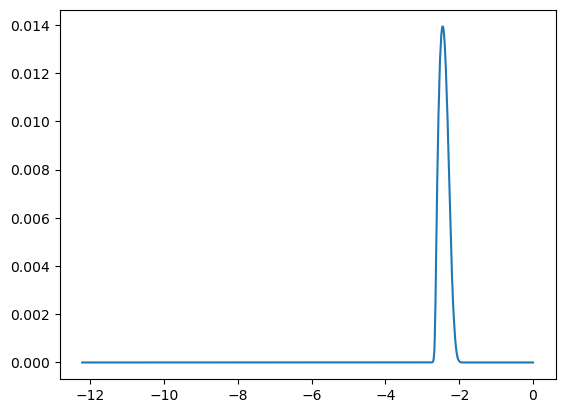

In [18]:
plt.plot(h.logxq,h.ni56)

In [15]:
nickel=-np.gradient(h.mass,len(h.zone))*h.ni56
print(nickel.sum()*0.64)

1.0816743838922465e-08


In [5]:
file_pattern = os.path.join(directory_path, 'profile*.data')
data_files = glob.glob(file_pattern)
print(data_files)

['/userdata/data/bhat/D6/KavliSP23/Test_Ni/Long_Evolve/LOGS_burning/profile1.data', '/userdata/data/bhat/D6/KavliSP23/Test_Ni/Long_Evolve/LOGS_burning/profile2.data', '/userdata/data/bhat/D6/KavliSP23/Test_Ni/Long_Evolve/LOGS_burning/profile3.data', '/userdata/data/bhat/D6/KavliSP23/Test_Ni/Long_Evolve/LOGS_burning/profile4.data', '/userdata/data/bhat/D6/KavliSP23/Test_Ni/Long_Evolve/LOGS_burning/profile5.data', '/userdata/data/bhat/D6/KavliSP23/Test_Ni/Long_Evolve/LOGS_burning/profile6.data', '/userdata/data/bhat/D6/KavliSP23/Test_Ni/Long_Evolve/LOGS_burning/profile7.data', '/userdata/data/bhat/D6/KavliSP23/Test_Ni/Long_Evolve/LOGS_burning/profile8.data', '/userdata/data/bhat/D6/KavliSP23/Test_Ni/Long_Evolve/LOGS_burning/profile9.data', '/userdata/data/bhat/D6/KavliSP23/Test_Ni/Long_Evolve/LOGS_burning/profile10.data', '/userdata/data/bhat/D6/KavliSP23/Test_Ni/Long_Evolve/LOGS_burning/profile11.data', '/userdata/data/bhat/D6/KavliSP23/Test_Ni/Long_Evolve/LOGS_burning/profile12.data', 

In [6]:
# Create a slider for file selection
file_slider = widgets.IntSlider(min=0, max=len(data_files)-1, step=1, description='File Index')
# Create an Output widget for the plot
plot_output = widgets.Output()

In [13]:
# Create a function to update the plot based on the file index
def update_plot(file_index):
    file = data_files[file_index]
    data = MesaData(file)

    with plot_output:
        clear_output(wait=True)
        figs, axs=plt.subplots(4,1,figsize=(4,10))
        axs[0].plot(10**data.logR[1:],np.log10(data.xq[1:]))
        axs[0].set_ylabel('Mass')
        axs[1].plot(data.xq, data.ni56)
        axs[1].set_ylabel('log10(ni56)')
        #axs[1].set_title('Composition')
        axs[2].plot(data.zone, data.luminosity)
        axs[2].set_ylabel('log10(S)')
        axs[3].plot(data.zone, np.log10(data.T))
        axs[3].set_ylabel('Luminosity')
        plt.xlabel('Radius')
        #plt.title(f'Mass and composition vs. Radius for File: {os.path.basename(file)}')
        plt.show()

In [14]:
file_slider_output = widgets.interactive_output(update_plot, {'file_index': file_slider})


In [12]:
display(widgets.HBox([plot_output, file_slider]))


# History


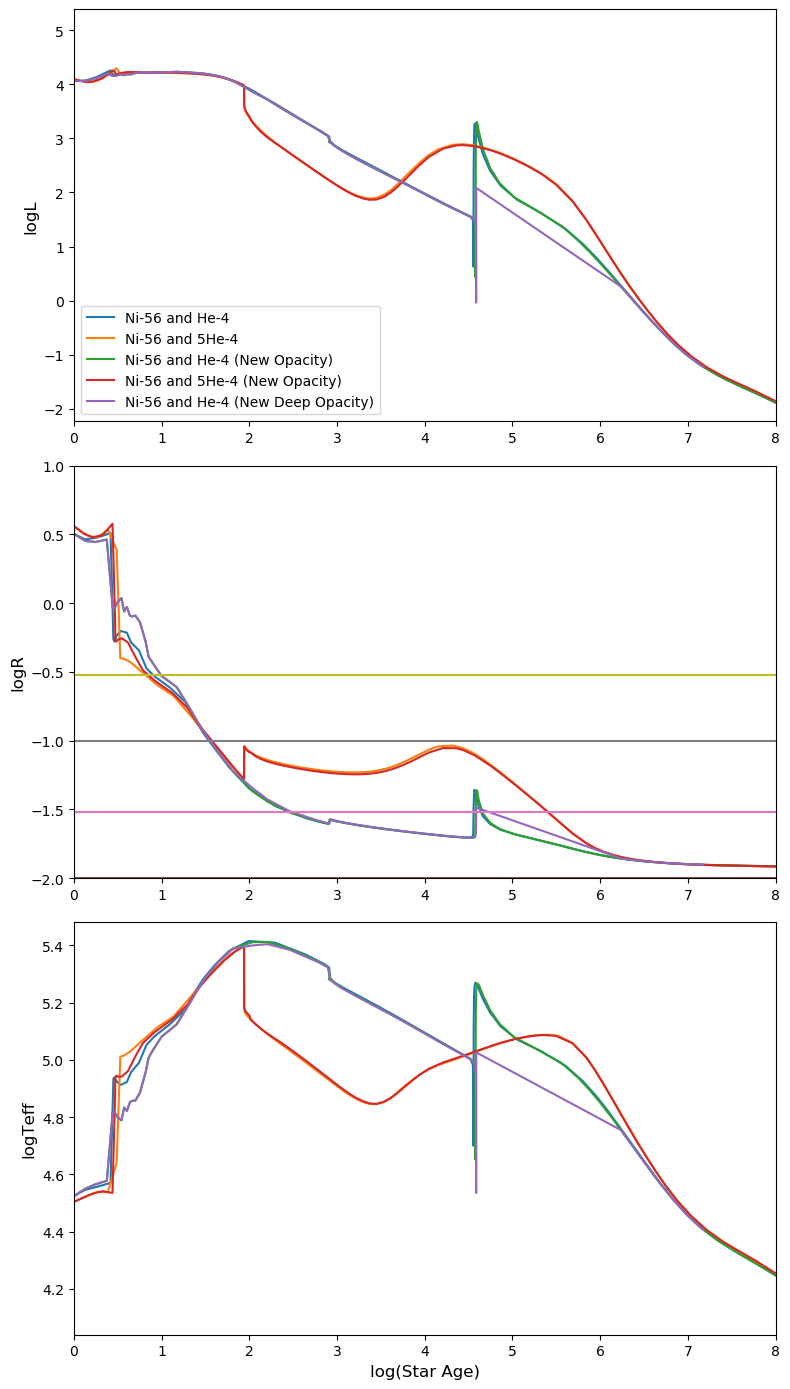

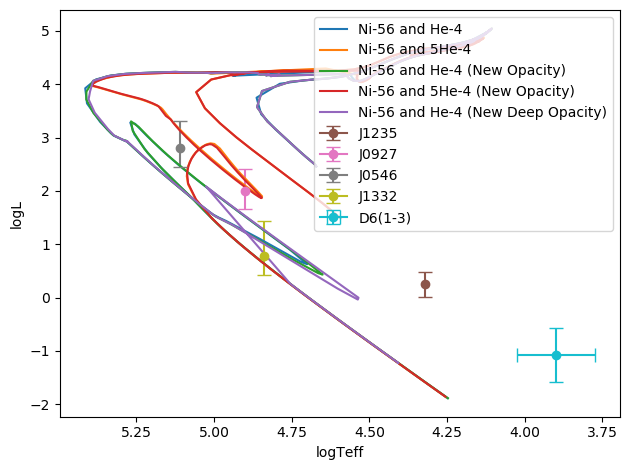

In [9]:
h = MesaData(os.path.join(directory_path, 'history.data'))
h2 = MesaData(os.path.join(directory_path2, 'history.data'))
h3 = MesaData(os.path.join(directory_path3, 'history.data'))
h4 = MesaData(os.path.join(directory_path4, 'history.data'))
h5 = MesaData(os.path.join(directory_path5, 'history.data'))
h6 = MesaData(os.path.join(directory_path6, 'history.data'))
h7 = MesaData(os.path.join(directory_path7, 'history.data'))
h8 = MesaData(os.path.join(directory_path8, 'history.data'))
plt.style.use('default')
figs, axs=plt.subplots(3,1,figsize=(8,14))
#axs[0].plot(np.log10(h.star_age), h.log_L)
#axs[0].plot(np.log10(h2.star_age), h2.log_L)
#axs[0].plot(np.log10(h3.star_age), h3.log_L)
axs[0].plot(np.log10(h4.star_age), h4.log_L) #Opacities start after 100 years (unless mass loss -15)
axs[0].plot(np.log10(h5.star_age), h5.log_L)
axs[0].plot(np.log10(h6.star_age), h6.log_L)
axs[0].plot(np.log10(h7.star_age), h7.log_L)
axs[0].plot(np.log10(h8.star_age), h8.log_L)
axs[0].set_xlim(0,8)

axs[0].set_ylabel("logL",fontsize=12)
axs[0].legend(('Ni-56 and He-4','Ni-56 and 5He-4','Ni-56 and He-4 (New Opacity)',
               'Ni-56 and 5He-4 (New Opacity)','Ni-56 and He-4 (New Deep Opacity)'))
#axs[1].plot(np.log10(h.star_age), h.log_R)
#axs[1].plot(np.log10(h2.star_age), h2.log_R)
#axs[1].plot(np.log10(h3.star_age), h3.log_R)
axs[1].plot(np.log10(h4.star_age), h4.log_R)
axs[1].plot(np.log10(h5.star_age), h5.log_R)
axs[1].plot(np.log10(h6.star_age), h6.log_R)
axs[1].plot(np.log10(h7.star_age), h7.log_R)
axs[1].plot(np.log10(h8.star_age), h8.log_R)
axs[1].plot((0,8),(-2,-2))
axs[1].plot((0,8),(-1.52,-1.52))
axs[1].plot((0,8),(-1,-1))
axs[1].plot((0,8),(-0.52,-0.52))
axs[1].set_xlim(0,8)
axs[1].set_ylim(-2,1)

axs[1].set_ylabel("logR",fontsize=12)
#axs[2].plot(np.log10(h.star_age), h.log_Teff)
#axs[2].plot(np.log10(h2.star_age), h2.log_Teff)
#axs[2].plot(np.log10(h3.star_age), h3.log_Teff)
axs[2].plot(np.log10(h4.star_age), h4.log_Teff)
axs[2].plot(np.log10(h5.star_age), h5.log_Teff)
axs[2].plot(np.log10(h6.star_age), h6.log_Teff)
axs[2].plot(np.log10(h7.star_age), h7.log_Teff)
axs[2].plot(np.log10(h8.star_age), h8.log_Teff)

axs[2].set_ylabel("logTeff",fontsize=12)
plt.xlim(0,8)

# set axis labels
plt.xlabel('log(Star Age)',fontsize=12)
plt.tight_layout()

#figs.savefig("../Long_Evolve_Ni_opacity_massloss/Plots_burning/comparison_withobservations.pdf")
fig=plt.figure()
#plt.plot(h.log_Teff, h.log_L)
#plt.plot(h2.log_Teff, h2.log_L)
#plt.plot(h3.log_Teff, h3.log_L)
plt.plot(h4.log_Teff, h4.log_L)
plt.plot(h5.log_Teff, h5.log_L)
plt.plot(h6.log_Teff, h6.log_L)
plt.plot(h7.log_Teff, h7.log_L)
plt.plot(h8.log_Teff, h8.log_L)
plt.errorbar(4.32,0.26,yerr=([2*0.030/(0.104*np.log(10))],[0.5/np.log(10)]),marker='o',capsize=5)
plt.errorbar(4.90,1.99,yerr=([2*0.020/(0.052*np.log(10))],[2*0.025/(0.052*np.log(10))]),marker='o',capsize=5)
plt.errorbar(5.11,2.81,yerr=([2*0.021/(0.051*np.log(10))],[2*0.029/(0.051*np.log(10))]),marker='o',capsize=5)
plt.errorbar(4.84,0.78,yerr=([2*0.007/(0.017*np.log(10))],[2*0.013/(0.017*np.log(10))]),marker='o',capsize=5)
plt.errorbar(3.9,-1.08,xerr=([0.125],[0.125]),yerr=([1.16/np.log(10)],[1.16/np.log(10)]),marker='o',capsize=5) #1-sigma with 8kpm1k Teff and 0.15pm0.05 radius
plt.xlabel('logTeff')
plt.ylabel('logL')

plt.legend(('Ni-56 and He-4','Ni-56 and 5He-4','Ni-56 and He-4 (New Opacity)',
            'Ni-56 and 5He-4 (New Opacity)','Ni-56 and He-4 (New Deep Opacity)','J1235','J0927','J0546','J1332','D6(1-3)'
            ),
           fontsize=10,loc='upper right')



# invert the x-axis
plt.gca().invert_xaxis()
#plt.scatter(4.322,-4.408)
#plt.scatter(4.903,-4.334)
#plt.scatter(5.113,-4.4508)
#plt.scatter(4.845,-5.264)
#plt.ylim(-6,6)
plt.tight_layout()
plt.savefig("../Long_Evolve_Ni_opacity_massloss/Plots_burning/HR_withobservations_2.pdf")
#plt.savefig("Plots_burning/HR_1d8.png")

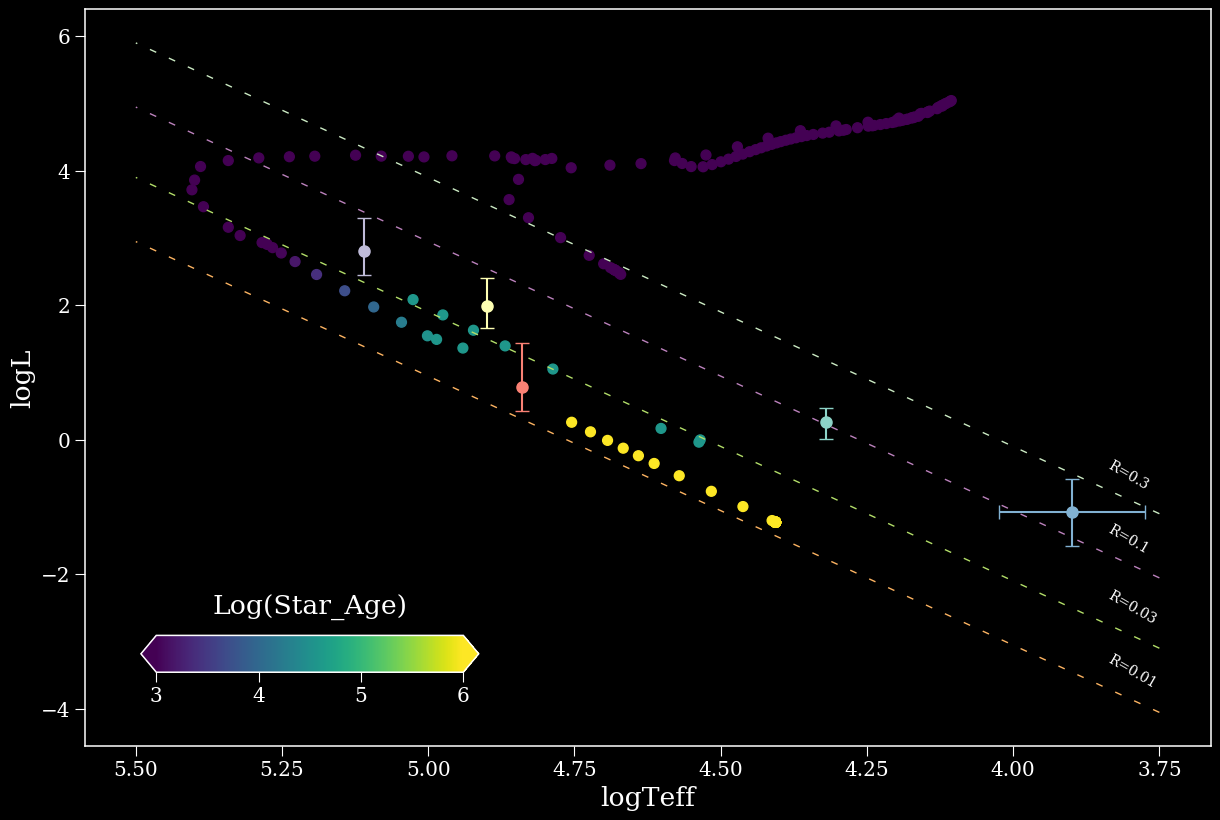

In [66]:
import matplotlib.gridspec as gridspec
from mpl_toolkits.axes_grid1.inset_locator import inset_axes
fig=plt.figure()
gs = gridspec.GridSpec(1, 1)
ax0 = plt.subplot(gs[0,0])
r=[0.01,0.03,0.1,0.3]
logt=np.linspace(3.75,5.5,20)
plot1=plt.scatter(h8.log_Teff, h8.log_L,c=np.log10(h8.star_age),vmin=3,vmax=6,cmap='viridis',s=50)

plt.style.use('dark_background')
plt.errorbar(4.32,0.26,yerr=([2*0.030/(0.104*np.log(10))],[0.5/np.log(10)]),marker='o',capsize=5,markersize=8)
plt.errorbar(4.90,1.99,yerr=([2*0.020/(0.052*np.log(10))],[2*0.025/(0.052*np.log(10))]),marker='o',capsize=5,markersize=8)
plt.errorbar(5.11,2.81,yerr=([2*0.021/(0.051*np.log(10))],[2*0.029/(0.051*np.log(10))]),marker='o',capsize=5,markersize=8)
plt.errorbar(4.84,0.78,yerr=([2*0.007/(0.017*np.log(10))],[2*0.013/(0.017*np.log(10))]),marker='o',capsize=5,markersize=8)
plt.errorbar(3.9,-1.08,xerr=([0.125],[0.125]),yerr=([1.16/np.log(10)],[1.16/np.log(10)]),marker='o',capsize=5,markersize=8) #1-sigma with 8kpm1k Teff and 0.15pm0.05 radius
for i in range(len(r)):
    logl=2*np.log10(r[i])+4*logt-4*np.log10(5800)
    plt.plot(logt,logl,linestyle=(0,(5,10)),linewidth=1)
    plt.annotate("R={}".format(r[i]),(logt[1],logl[1]),rotation=-30)
plt.tight_layout()
plt.gca().invert_xaxis()
plt.xlabel('logTeff')
plt.ylabel('logL')
cbaxes = plt.gca().inset_axes( (0.05,0.1,0.3,0.05)) 
colorbar=plt.colorbar(plot1,extend='both',orientation='horizontal',cax=cbaxes)
colorbar.set_label(label='Log(Star_Age)',labelpad=-80)  # Adjust the value of 'labelpad' as needed


#plt.legend(('Ni-56 and 5He-4 (New Opacity)','J1235','J0927','J0546','J1332','D6(1-3)'),
#           fontsize=10,loc='upper right')
#plt.savefig("../Long_Evolve_Ni_opacity_massloss/Plots_burning/HR_time_5he4.pdf")


# Composition

In [ ]:
h2 = np.genfromtxt('/userdata/data/bhat/D6/KavliSP23/Test1/Long_Evolve/composition.dat',skip_header=1)
h = MesaData(os.path.join(directory_path, 'profile11.data'))
plt.plot(h.xq, np.log10(h.he4))
plt.plot(h.xq, np.log10(h.c12))
plt.plot(h.xq, np.log10(h.n14))
plt.plot(h.xq, np.log10(h.o16))
plt.plot(h.xq, np.log10(h.fe56))
plt.ylim(-15,0)
plt.plot(h2[:,0],np.log10(h2[:,3]))
plt.plot(h2[:,0],np.log10(h2[:,4]))
plt.plot(h2[:,0],np.log10(h2[:,5]))
plt.plot(h2[:,0],np.log10(h2[:,6]))
plt.plot(h2[:,0],np.log10(h2[:,12]))

# set axis labels
plt.legend(("he4","c12","n14","o16","fe56","he4R","c12r","n14r","o16r","fe56r"))

plt.xlabel(r'$X_q$')
plt.ylabel(r'$X_n$')